In [1]:
import os
import copy
import time
import asyncio
import warnings
import logging

from pathlib import Path

import numpy as np
from astropy.io import fits

from scipy import ndimage
from scipy.signal import medfilt
from scipy.ndimage.filters import gaussian_filter
from astropy.modeling import models, fitting


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 6]

#Import CWFS package
from lsst import cwfs
from lsst.cwfs.instrument import Instrument
from lsst.cwfs.algorithm import Algorithm
from lsst.cwfs.image import Image, readFile, aperture2image, showProjection
import lsst.cwfs.plots as plots

%matplotlib inline

In [2]:
import wget

In [3]:
from lsst.ts import salobj
# from lsst.ts.standardscripts.auxtel.attcs import ATTCS
import asyncio

In [4]:
cam = salobj.Remote(salobj.Domain(), "GenericCamera", 1)

In [5]:
await cam.start_task

Waiting intra image
1579847979-etaLeo_intra-0-1
1579848020-etaLeo_extra-0-1
1579847979-etaLeo_intra-0-1.fits
1579848020-etaLeo_extra-0-1.fits
2 -8
Creating stamps of centroid [y,x] = [473,540] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


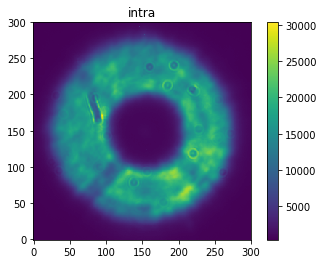

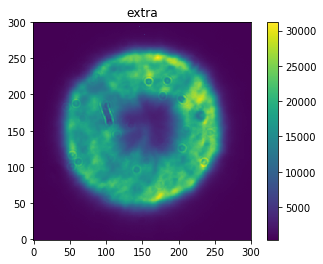

Extra-focal filename: 1579848020-etaLeo_extra-0-1.fits
Intra-focal filename: 1579847979-etaLeo_intra-0-1.fits
[-328.90741298  231.73637978  -72.39837505  -21.46025835   55.40824535
   53.84961106   63.78558562   12.58447617   16.04439871  -33.53658273
   -4.05040221   -7.64797676   17.08147707    3.00948133  -10.1258647
   -7.59193484   -6.20063983    7.87743628  -18.41141649]


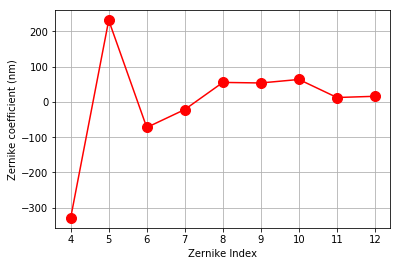

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 81 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 75 messages


1579848220-etaLeo_intra-0-1
1579848261-etaLeo_extra-0-1
1579848220-etaLeo_intra-0-1.fits
1579848261-etaLeo_extra-0-1.fits
8 -14
Creating stamps of centroid [y,x] = [467,533] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


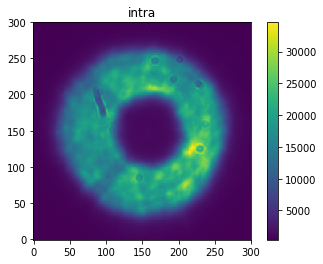

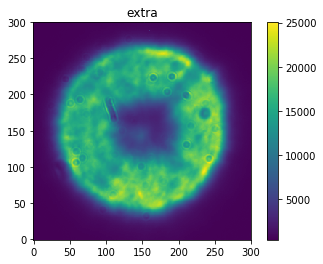

Extra-focal filename: 1579848261-etaLeo_extra-0-1.fits
Intra-focal filename: 1579848220-etaLeo_intra-0-1.fits
[121.19959549 148.13658903   5.29222957 -79.82027035  63.81355842
 -33.1434356   67.83778876   9.20026046   6.05308502 -25.9602382
 -16.30069618 -11.54560446  13.40314024  14.29509333   3.46549359
  -8.97409176   8.66103543  -9.98032039 -18.47170392]


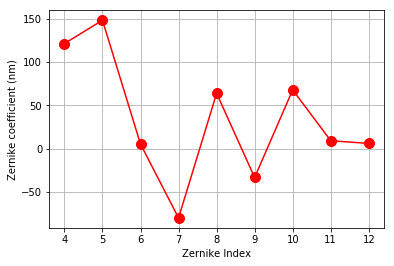

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 82 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 75 messages


1579848438-etaLeo_intra-0-1
1579848483-etaLeo_extra-0-1
1579848438-etaLeo_intra-0-1.fits
1579848483-etaLeo_extra-0-1.fits
12 -17
Creating stamps of centroid [y,x] = [462,527] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


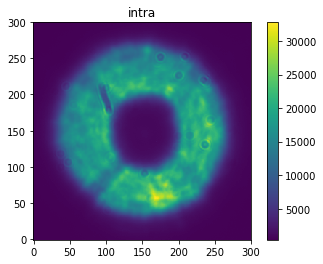

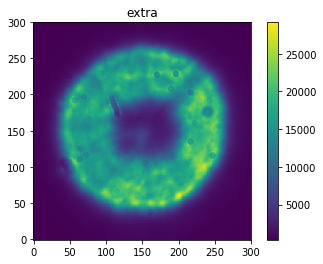

Extra-focal filename: 1579848483-etaLeo_extra-0-1.fits
Intra-focal filename: 1579848438-etaLeo_intra-0-1.fits
[-12.9538406  167.3141871   99.70184646 -84.21564459  58.64314785
 -57.80225457  46.75612932   5.55079617  -1.32161574  -0.69134875
 -39.43613971 -33.55429049   6.93111666   3.67213976   2.3568719
   9.77971318  -1.89802611 -17.42943251 -15.28660046]


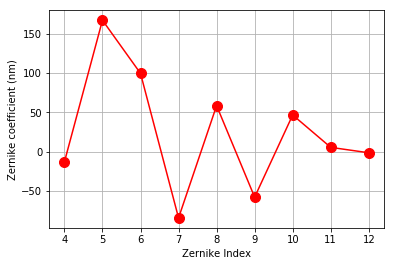

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 83 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 77 messages


1579849059-etaLeo_intra-0-1
1579849104-etaLeo_extra-0-1
1579849059-etaLeo_intra-0-1.fits
1579849104-etaLeo_extra-0-1.fits
10 -17
Creating stamps of centroid [y,x] = [519,569] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


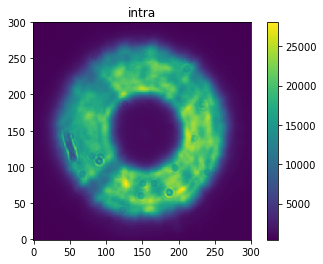

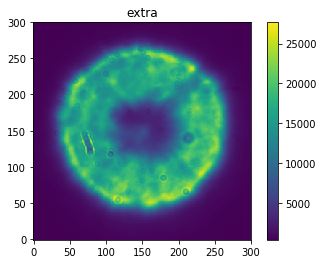

Extra-focal filename: 1579849104-etaLeo_extra-0-1.fits
Intra-focal filename: 1579849059-etaLeo_intra-0-1.fits
[-2.66726039e+01  3.66872690e+01  1.61466197e+02 -6.05602212e+01
  6.68228142e+01 -3.59086035e+01  3.13392612e+01  1.11046672e+01
  6.44694943e+00 -6.73004492e+00 -3.06200277e+01 -6.10240094e+00
  1.39987679e+00  2.07063928e+00  1.94772140e+00 -6.11461462e-01
  1.54672671e-01 -2.25358263e+01 -2.04619780e+01]


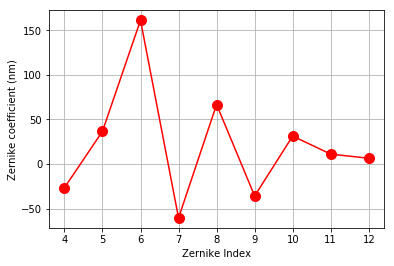

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 86 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 80 messages


1579849322-etaLeo_intra-0-1
1579849366-etaLeo_extra-0-1
1579849322-etaLeo_intra-0-1.fits
1579849366-etaLeo_extra-0-1.fits
3 -13
Creating stamps of centroid [y,x] = [515,515] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


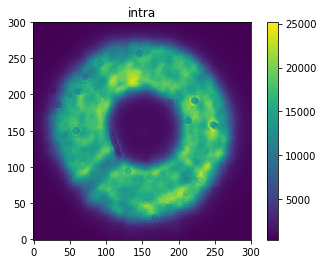

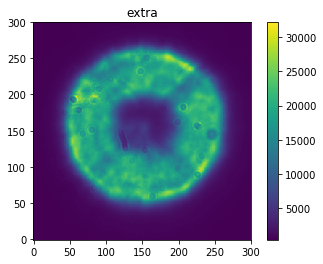

Extra-focal filename: 1579849366-etaLeo_extra-0-1.fits
Intra-focal filename: 1579849322-etaLeo_intra-0-1.fits
[-310.44675607  105.47854547   95.16650938  -12.82060228  -23.58914333
  -30.93334424   68.12863384    6.87193188    0.80022032  -18.31531422
  -15.68959705  -13.73686305   17.48996007    3.67488225   -6.74565051
    2.47142733   -7.99686575   -1.71022879  -13.12753103]


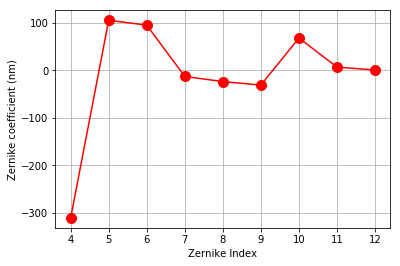

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 83 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 77 messages


1579849576-etaLeo_intra-0-1
1579849620-etaLeo_extra-0-1
1579849576-etaLeo_intra-0-1.fits
1579849620-etaLeo_extra-0-1.fits
6 -12
Creating stamps of centroid [y,x] = [521,515] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


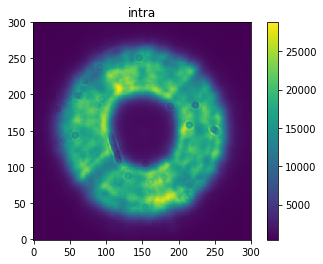

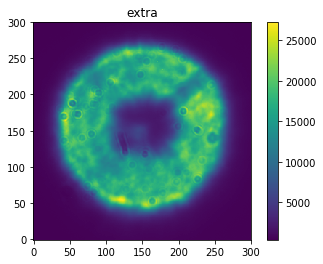

Extra-focal filename: 1579849620-etaLeo_extra-0-1.fits
Intra-focal filename: 1579849576-etaLeo_intra-0-1.fits
[ 38.33040726  84.14836777  58.52725091 -19.05504939  15.08826596
 -60.693546    46.83987845   0.82308202  -9.91366031 -10.22141243
 -12.32248093  -5.79059994   3.70121763  -0.12753913  -7.22181523
   5.34809728   2.55457992 -18.40491974 -13.08426157]


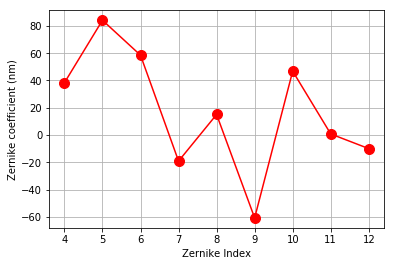

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 83 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 76 messages


1579849940-etaLeo_intra-0-1
1579849971-etaLeo_extra-0-1
1579849940-etaLeo_intra-0-1.fits
1579849971-etaLeo_extra-0-1.fits
8 -23
Creating stamps of centroid [y,x] = [478,528] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


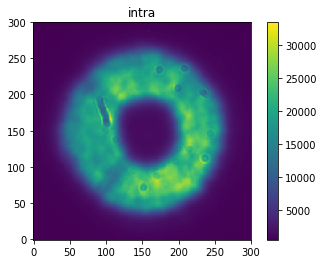

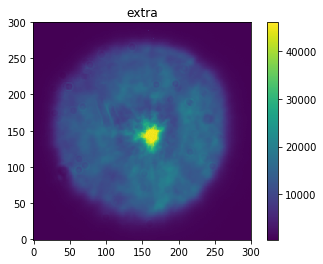

Extra-focal filename: 1579849971-etaLeo_extra-0-1.fits
Intra-focal filename: 1579849940-etaLeo_intra-0-1.fits
[193.2346439   97.47589626  65.62545781 -63.66692041  80.75842068
 -43.39133679  94.6757676   59.09831555  -9.01870548 -15.33097296
 -18.22065155   5.58820641   4.59636056   2.3997247  -11.06460332
   0.25279395   5.5992285  -10.69679548 -16.33364165]


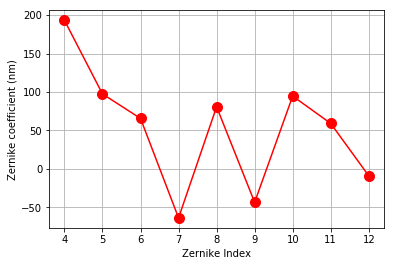

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 84 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 78 messages


1579850144-etaLeo_intra-0-1
1579850175-etaLeo_extra-0-1
1579850144-etaLeo_intra-0-1.fits


HTTPError: HTTP Error 404: File not found

In [6]:
for i in range(10):
    print("================================================================================")
    print("Waiting intra image")
    cam.evt_endReadout.flush()
    intra_endron = await cam.evt_endReadout.next(flush=False)
    if "intra" not in intra_endron.imageName:
        print(f"Got {intra_endron.imageName}. Not an intra image... skipping")
        continue
    print(intra_endron.imageName)

    extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
    print(extra_endron.imageName)

    intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
    extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
    intra_fname = wget.download(intra_wget_url)
    print(f"============")
    print(f'{intra_fname}')
    extra_fname = wget.download(extra_wget_url)
    print(f'{extra_fname}')
    print(f"============")

    # Open fits files, note you can start here if your files exist already

    #intra_fname='I1_intra_20190908.fits'
    intra_exp=(fits.open(intra_fname))[0].data

    #extra_fname='I2_extra_20190908.fits'
    extra_exp=(fits.open(extra_fname))[0].data

    # Show images added together to estimate centroid
    plt.imshow(intra_exp+extra_exp)

    # Define the image it will use to perform final center
    im_shape=intra_exp.shape
    side=300
    # Set to False to declare centroid manually!
    if True:
        im= (intra_exp+extra_exp)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
    #     im_filtered[im_filtered < mean] = 0.
    #     im_filtered[im_filtered > mean] = 1.
        # iter 1
        ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        # iter 2
        intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
        extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
        im= (intra_square+extra_square)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
        im_filtered[im_filtered < mean] = 0.
        im_filtered[im_filtered > mean] = 1.
        # iter 1
        cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        print(cy2-side, cx2-side)    
        ceny += (cy2-side)
        cenx += (cx2-side)
    else:
        # Manually declare where the center is
        ceny=350 #round(im_shape[0]/2)
        cenx=450 # round(im_shape[1]/2)
    side=150 # side length of image
    print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
    im_shape=intra_exp.shape
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

    #Create object for CWFS code
    # Select where your object is, but ours will be on-axis
    fieldXY = [0.0,0.0]

    # I1/I2 get modified down below, so reset here
    I1 = None; I2=None
    I1 = Image(intra_square, fieldXY, Image.INTRA)
    I2 = Image(extra_square, fieldXY, Image.EXTRA)

    # Declare instrument
    inst=Instrument('auxtel',I1.sizeinPix) # example
    hex_to_focus_scale = 41.0
    offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
    pixelsize = 3.6e-6*4 # 4 is the binning
    # FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

    print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
    print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
    print('pixelSize should be: {}'.format(pixelsize))

    #declare algorithm
    # declare algorithm - exponential solver.
    algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


    # Plot images
    plots.plotImage(I1.image,'intra') 
    #plots.plotImage(I_focus.image,'focus')
    plots.plotImage(I2.image,'extra')
    print('Extra-focal filename: {}'.format(extra_fname))
    print('Intra-focal filename: {}'.format(intra_fname))

    algo.runIt(inst,I1,I2,'onAxis')
    print(algo.zer4UpNm)
    plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [ ]:

cam.evt_endReadout.flush()

intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(intra_endron.imageName)

extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(extra_endron.imageName)

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [ ]:

cam.evt_endReadout.flush()

intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(intra_endron.imageName)

extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(extra_endron.imageName)

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [ ]:

cam.evt_endReadout.flush()

intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(intra_endron.imageName)

extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(extra_endron.imageName)

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [ ]:

cam.evt_endReadout.flush()

intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(intra_endron.imageName)

extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(extra_endron.imageName)

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [ ]:

cam.evt_endReadout.flush()

intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(intra_endron.imageName)

extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(extra_endron.imageName)

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

1579850788-etaLeo_intra-0-1
1579850828-etaLeo_extra-0-1
1579850788-etaLeo_intra-0-1.fits
1579850828-etaLeo_extra-0-1.fits
11 -28
Creating stamps of centroid [y,x] = [411,536] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


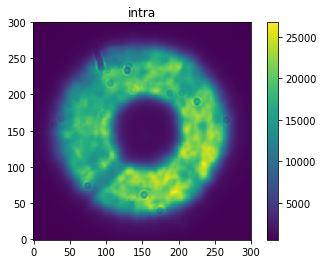

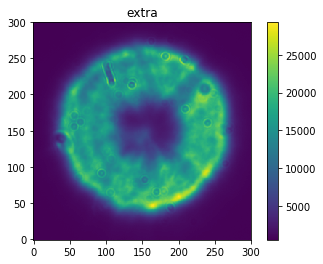

Extra-focal filename: 1579850828-etaLeo_extra-0-1.fits
Intra-focal filename: 1579850788-etaLeo_intra-0-1.fits
[ 45.58398558 -20.94330337  27.02943255 -97.53013238  78.45520193
 -30.6245845   55.72976515   2.58177525  -2.2593169  -14.17638821
 -17.11991278   8.26919767   4.77973214  10.29160715  -5.12226881
   0.50604226 -22.63963022  -4.63144627 -13.86394048]


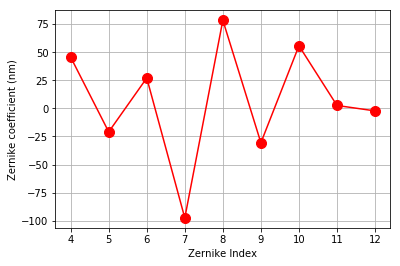

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 81 messages


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 75 messages


TimeoutError: 

In [11]:
for i in range(2):

    print(f"================================")
    cam.evt_endReadout.flush()

    intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
    print(intra_endron.imageName)

    extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
    print(extra_endron.imageName)

    intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
    extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
    intra_fname = wget.download(intra_wget_url)
    print(f"============")
    print(f'{intra_fname}')
    extra_fname = wget.download(extra_wget_url)
    print(f'{extra_fname}')
    print(f"============")

    # Open fits files, note you can start here if your files exist already

    #intra_fname='I1_intra_20190908.fits'
    intra_exp=(fits.open(intra_fname))[0].data

    #extra_fname='I2_extra_20190908.fits'
    extra_exp=(fits.open(extra_fname))[0].data

    # Show images added together to estimate centroid
    plt.imshow(intra_exp+extra_exp)

    # Define the image it will use to perform final center
    im_shape=intra_exp.shape
    side=300
    # Set to False to declare centroid manually!
    if True:
        im= (intra_exp+extra_exp)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
    #     im_filtered[im_filtered < mean] = 0.
    #     im_filtered[im_filtered > mean] = 1.
        # iter 1
        ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        # iter 2
        intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
        extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
        im= (intra_square+extra_square)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
        im_filtered[im_filtered < mean] = 0.
        im_filtered[im_filtered > mean] = 1.
        # iter 1
        cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        print(cy2-side, cx2-side)    
        ceny += (cy2-side)
        cenx += (cx2-side)
    else:
        # Manually declare where the center is
        ceny=350 #round(im_shape[0]/2)
        cenx=450 # round(im_shape[1]/2)
    side=150 # side length of image
    print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
    im_shape=intra_exp.shape
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

    #Create object for CWFS code
    # Select where your object is, but ours will be on-axis
    fieldXY = [0.0,0.0]

    # I1/I2 get modified down below, so reset here
    I1 = None; I2=None
    I1 = Image(intra_square, fieldXY, Image.INTRA)
    I2 = Image(extra_square, fieldXY, Image.EXTRA)

    # Declare instrument
    inst=Instrument('auxtel',I1.sizeinPix) # example
    hex_to_focus_scale = 41.0
    offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
    pixelsize = 3.6e-6*4 # 4 is the binning
    # FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

    print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
    print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
    print('pixelSize should be: {}'.format(pixelsize))

    #declare algorithm
    # declare algorithm - exponential solver.
    algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


    # Plot images
    plots.plotImage(I1.image,'intra') 
    #plots.plotImage(I_focus.image,'focus')
    plots.plotImage(I2.image,'extra')
    print('Extra-focal filename: {}'.format(extra_fname))
    print('Intra-focal filename: {}'.format(intra_fname))

    algo.runIt(inst,I1,I2,'onAxis')
    print(algo.zer4UpNm)
    plots.plotZer(algo.zer4UpNm[0:9],'nm')
    print(f"================================")

1579850604-etaLeo_intra-0-1
1579850645-etaLeo_extra-0-1
1579850604-etaLeo_intra-0-1.fits
1579850645-etaLeo_extra-0-1.fits
12 -26
Creating stamps of centroid [y,x] = [422,541] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


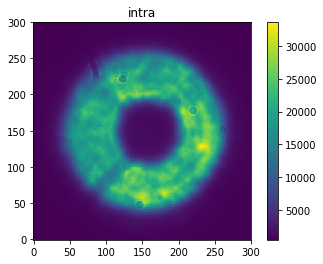

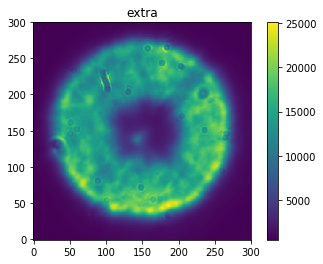

Extra-focal filename: 1579850645-etaLeo_extra-0-1.fits
Intra-focal filename: 1579850604-etaLeo_intra-0-1.fits
[424.60521034  -1.6373792   22.21966385 -82.12027726  46.21716114
 -22.8026619   27.54986992   2.53215037  -2.74878782 -13.74692984
 -34.88621248  11.04228498  11.398496     2.09712559   5.62038424
   8.71272939 -13.45936478  -0.84023312 -15.41097841]


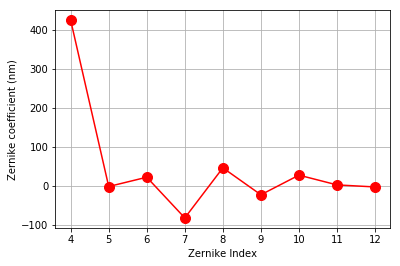

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 42 messages
RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 74 messages


In [10]:

# cam.evt_endReadout.flush()

intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(intra_endron.imageName)

extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(extra_endron.imageName)

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [7]:
intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")



1579850144-etaLeo_intra-0-1 (1).fits
1579850175-etaLeo_extra-0-1.fits


In [8]:
#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data



Waiting intra image
1579851156-etaLeo_intra-0-1
1579851196-etaLeo_extra-0-1
1579851156-etaLeo_intra-0-1.fits
1579851196-etaLeo_extra-0-1.fits
11 -22
Creating stamps of centroid [y,x] = [480,595] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


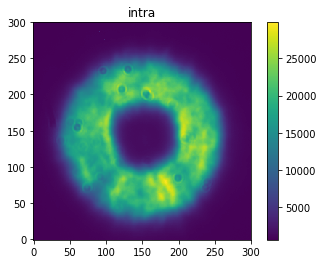

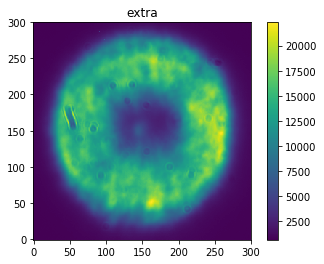

Extra-focal filename: 1579851196-etaLeo_extra-0-1.fits
Intra-focal filename: 1579851156-etaLeo_intra-0-1.fits
[439.96161154  62.19058648  34.23745845 -43.34902861  58.7277393
 -24.86786151  45.05617344   3.51751581  -8.65887557 -10.74318019
 -16.61092037 -10.98283798   4.95480577  14.90633359   2.39397628
   7.27367534 -10.72345031   0.47359948 -10.0282305 ]


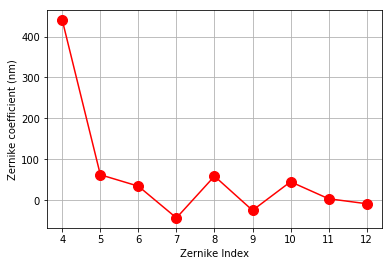

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 82 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 76 messages


1579851396-etaLeo_intra-0-1
1579851436-etaLeo_extra-0-1
1579851396-etaLeo_intra-0-1.fits
1579851436-etaLeo_extra-0-1.fits
5 -18
Creating stamps of centroid [y,x] = [550,593] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


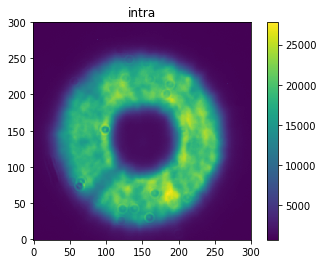

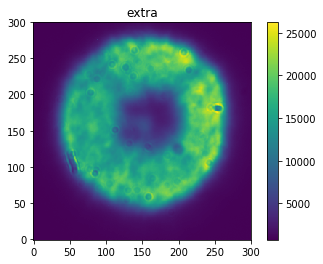

Extra-focal filename: 1579851436-etaLeo_extra-0-1.fits
Intra-focal filename: 1579851396-etaLeo_intra-0-1.fits
[ 1.06777733e+02  9.36488216e+01 -5.18663967e+00 -1.38958391e+01
  7.02938329e+01 -3.59038893e+01  6.91177460e+01 -3.35499917e-01
 -1.56354443e+00 -1.62352145e+01 -2.61471124e-01  1.90178758e+01
  7.32549432e+00  5.29417824e+00 -5.12603976e+00 -6.66101684e-02
  1.10000612e+01 -7.13677808e+00 -1.18488872e+01]


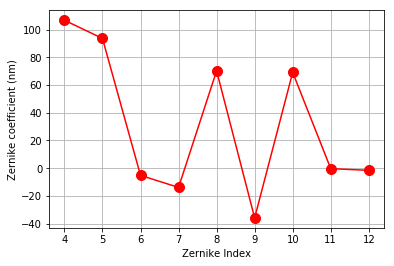

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 82 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 76 messages


1579851583-etaLeo_intra-0-1
1579851623-etaLeo_extra-0-1
1579851583-etaLeo_intra-0-1.fits
1579851623-etaLeo_extra-0-1.fits
8 -14
Creating stamps of centroid [y,x] = [475,589] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


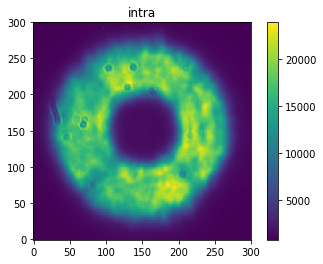

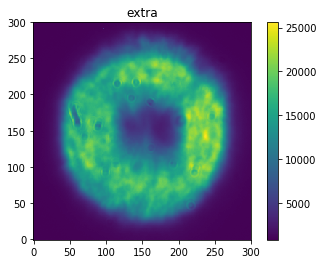

Extra-focal filename: 1579851623-etaLeo_extra-0-1.fits
Intra-focal filename: 1579851583-etaLeo_intra-0-1.fits
[-101.49480641   -7.29404792   57.18711955  -50.75705231   38.27032309
   -9.0970294    50.20635871   14.36396636  -19.41113508  -17.17845229
  -11.04024902    4.45749603    9.93651795   20.39213983   -4.05583418
   -6.4581447   -18.00517056   -2.40885401   -7.55235434]


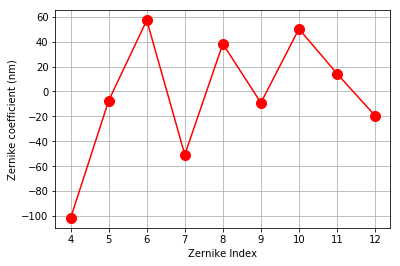

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 69 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 74 messages


1579851723-etaLeo_intra-0-1
1579851764-etaLeo_extra-0-1
1579851723-etaLeo_intra-0-1.fits
1579851764-etaLeo_extra-0-1.fits
8 -7
Creating stamps of centroid [y,x] = [460,583] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


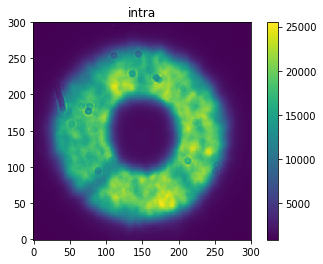

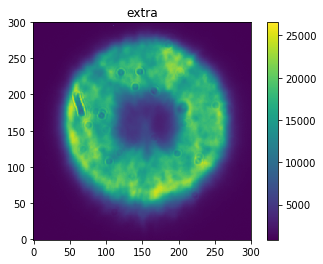

Extra-focal filename: 1579851764-etaLeo_extra-0-1.fits
Intra-focal filename: 1579851723-etaLeo_intra-0-1.fits
[-78.0112456   55.69082636 100.7931308  -53.2991018   34.05837184
  -6.79861047  66.56687739   9.63264038  -7.10379528 -10.6225997
 -13.6053441  -20.1113102    4.88551911   7.37236778 -13.78523379
   5.76751408 -17.22957578  -6.15411351 -12.36927853]


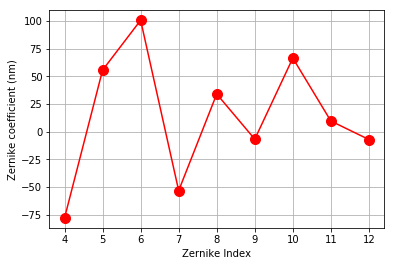

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 80 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 74 messages


1579851935-etaLeo_intra-0-1
1579851975-etaLeo_extra-0-1
1579851935-etaLeo_intra-0-1.fits
1579851975-etaLeo_extra-0-1.fits
10 0
Creating stamps of centroid [y,x] = [477,572] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


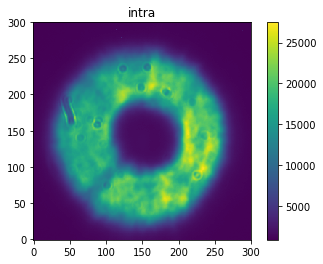

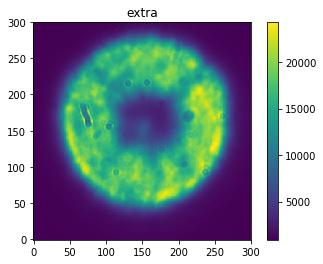

Extra-focal filename: 1579851975-etaLeo_extra-0-1.fits
Intra-focal filename: 1579851935-etaLeo_intra-0-1.fits
[ 22.38188729  36.08694978  24.63603388 -67.0698753   59.98761018
 -39.68038932  48.91762207   6.60898908  -2.93420057 -15.70237704
 -14.0235536   15.09022188   9.7375393   13.16541688  -1.72886533
  -5.86102909 -11.87282388  -8.31856757 -12.50126088]


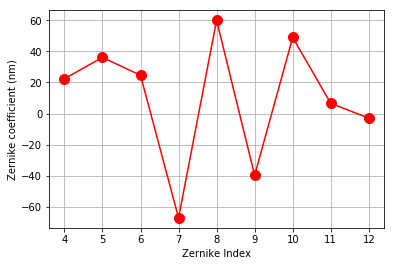

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 82 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 75 messages


In [ ]:
for i in range(10):
    print("================================================================================")
    print("Waiting intra image")
    cam.evt_endReadout.flush()
    intra_endron = await cam.evt_endReadout.next(flush=False)
    if "intra" not in intra_endron.imageName:
        print(f"Got {intra_endron.imageName}. Not an intra image... skipping")
        continue
    print(intra_endron.imageName)

    extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
    print(extra_endron.imageName)

    intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
    extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
    intra_fname = wget.download(intra_wget_url)
    print(f"============")
    print(f'{intra_fname}')
    extra_fname = wget.download(extra_wget_url)
    print(f'{extra_fname}')
    print(f"============")

    # Open fits files, note you can start here if your files exist already

    #intra_fname='I1_intra_20190908.fits'
    intra_exp=(fits.open(intra_fname))[0].data

    #extra_fname='I2_extra_20190908.fits'
    extra_exp=(fits.open(extra_fname))[0].data

    # Show images added together to estimate centroid
    plt.imshow(intra_exp+extra_exp)

    # Define the image it will use to perform final center
    im_shape=intra_exp.shape
    side=300
    # Set to False to declare centroid manually!
    if True:
        im= (intra_exp+extra_exp)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
    #     im_filtered[im_filtered < mean] = 0.
    #     im_filtered[im_filtered > mean] = 1.
        # iter 1
        ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        # iter 2
        intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
        extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
        im= (intra_square+extra_square)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
        im_filtered[im_filtered < mean] = 0.
        im_filtered[im_filtered > mean] = 1.
        # iter 1
        cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        print(cy2-side, cx2-side)    
        ceny += (cy2-side)
        cenx += (cx2-side)
    else:
        # Manually declare where the center is
        ceny=350 #round(im_shape[0]/2)
        cenx=450 # round(im_shape[1]/2)
    side=150 # side length of image
    print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
    im_shape=intra_exp.shape
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

    #Create object for CWFS code
    # Select where your object is, but ours will be on-axis
    fieldXY = [0.0,0.0]

    # I1/I2 get modified down below, so reset here
    I1 = None; I2=None
    I1 = Image(intra_square, fieldXY, Image.INTRA)
    I2 = Image(extra_square, fieldXY, Image.EXTRA)

    # Declare instrument
    inst=Instrument('auxtel',I1.sizeinPix) # example
    hex_to_focus_scale = 41.0
    offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
    pixelsize = 3.6e-6*4 # 4 is the binning
    # FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

    print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
    print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
    print('pixelSize should be: {}'.format(pixelsize))

    #declare algorithm
    # declare algorithm - exponential solver.
    algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


    # Plot images
    plots.plotImage(I1.image,'intra') 
    #plots.plotImage(I_focus.image,'focus')
    plots.plotImage(I2.image,'extra')
    print('Extra-focal filename: {}'.format(extra_fname))
    print('Intra-focal filename: {}'.format(intra_fname))

    algo.runIt(inst,I1,I2,'onAxis')
    print(algo.zer4UpNm)
    plots.plotZer(algo.zer4UpNm[0:9],'nm')